## Resume Screening with Python
In this section, I will take you through a Machine Learning project on Resume Screening with Python programming language. I will start this task by importing the necessary Python libraries and the dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
resume= pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


### Now let’s have a quick look at the categories of resumes present in the dataset:

In [3]:
resume['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
resume['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
Operations Manager           40
ETL Developer                40
Data Science                 40
Blockchain                   40
Sales                        40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

#### Now let’s visualize the number of categories in the dataset:

<AxesSubplot:xlabel='Category', ylabel='count'>

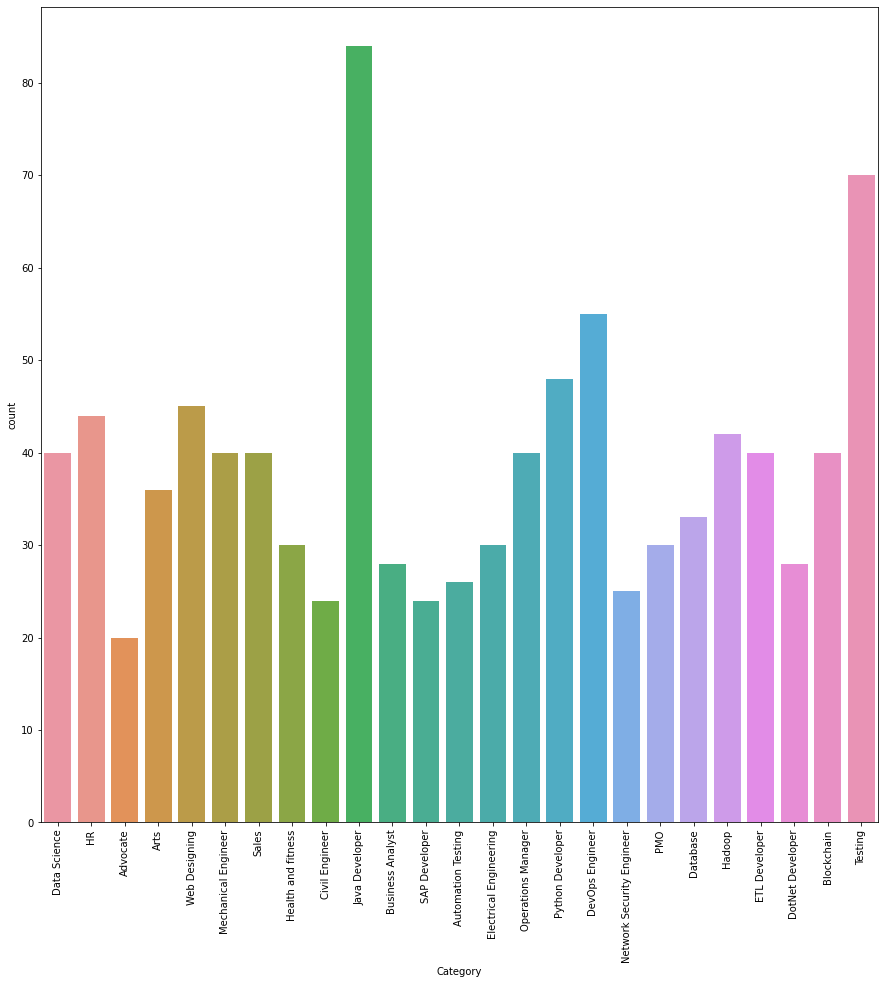

In [13]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(resume['Category'])

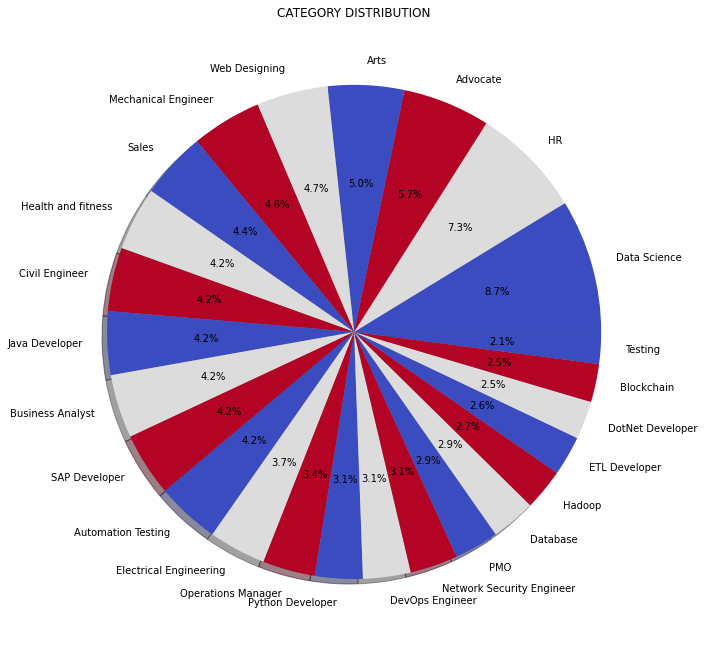

In [15]:
from matplotlib.gridspec import GridSpec
targetCounts = resume['Category'].value_counts()
targetLabels  = resume['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

### Text cleaning
- Remove the URLs, hashtags, mentions, special letters, and punctuations
- Removing stopswords 
- Lowering the letter
- After that doing stemming
- FInally appneding in the corpus


In [16]:
# We will clean the text by using these library:
import re   # regular expression
from nltk.corpus import stopwords # for removing stopwords from sentences
from nltk.stem.porter import PorterStemmer  #for stemning-- it will not make sentences into proper meaningful sentences 


In [19]:
ps=PorterStemmer()

In [20]:
corpus=[]
for i in range(len(resume)):
    review= re.sub('[^a-zAZ]',' ',resume['Resume'][i])
    review= review.lower()
    review= review.split()
    review= [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review= ' '.join(review)
    corpus.append(review)

In [21]:
corpus[2]

'area nterest eep earn ontrol ystem esign rogram ython lectric achineri eb evelop analyt echnic activ q industan aeronaut imit angalor week guidanc r atish enior ngineer hangar irag fighter aircraft echnic kill rogram atlab ython ava ab iew ython eb rame ork jango lask intermedi anguag intermedi ithub ash upyt otebook ampp asic ython oftwar ackag nterpret anaconda ython ython ycharm ava clips perat ystem indow buntu ebian ali inux ducat etail anuari ech lectric lectron ngineer anip nstitut echnolog anuari anuari ittl lower ublic chool august anip academi igher kill etail ata analysi xprienc ess year month excel xprienc ess year month achin earn xprienc ess year month mathemat xprienc ess year month ython xprienc ess year month atlab xprienc ess year month lectric ngineer xprienc ess year month ql xprienc ess year month ompani etail compani descript current work asino base oper name disclos acau need segment custom visit properti base valu patron bring compani asic prove segment done mu

### Now converting word to vector so that machine can understand

In [26]:
#Applying count vectorizer (also known as the “Bag of Words”). Maximum features passed here are 5000.
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1, 3))
X=cv.fit_transform(corpus).toarray()

In [27]:
y= resume['Category'] # dependent features

In [29]:
# lets convert the target column
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y=le.fit_transform(y) 


In [32]:
#Dataset is now split into train and test. The first 20 features are displayed here.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [33]:
#what are hyperparameter we used 
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [34]:
#The array is converted into dataframe.
df_resume=pd.DataFrame(X_train,columns=cv.get_feature_names())
df_resume.head()

,aa,ab,abacu,abacu lectron,abacu lectron vt,abil,abil work,abinet,abinet os,abinet os edund,...,ython eb,ython evelop,ython xprienc,ython xprienc ess,ython xprienc month,ython ython,zaggl,zaggl repaid,zaggl repaid cean,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Training Machine Learning Model for Resume Screening
Now the next step in the process is to train a model for the task of Resume Screening. Here I will use the one vs the rest classifier; naive bayes. For this task, I will first split the data into training and test sets:

In [35]:
# Building the model
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [37]:
#predicting 
y_pred=nb.predict(X_test)
y_pred

array([20, 14,  6, 17, 15, 14, 10, 14, 15,  2,  6, 23,  4, 11, 13,  4, 19,
        8,  8,  9, 12, 11, 17, 22, 19, 16,  5,  8,  3,  7, 20, 18, 22,  7,
       23, 23, 22, 18,  7, 20, 10, 20, 14,  8, 15, 15,  8, 11,  4, 22,  1,
       24, 14, 15, 22, 23,  8, 15,  3, 17, 18,  3,  0, 15, 15, 15, 16, 21,
       13, 18, 12, 23, 22, 12, 13, 22,  8,  7, 19,  4, 24, 14,  7,  1, 24,
       13, 12, 10,  9,  8, 22,  9, 23, 11,  9, 23, 11, 15, 23, 13,  4, 17,
        2,  5,  6, 10,  0, 19, 20, 10, 22, 10, 15, 10, 15, 15, 22,  6, 14,
        6,  0,  4,  5,  7,  9, 13, 23,  6,  9,  9, 21, 11,  5,  3,  9, 24,
       19, 13,  8,  3, 13, 13, 11, 20, 16, 23, 21, 24,  7, 21, 20, 15, 22,
       19, 15, 23,  9, 15, 15,  6,  2, 20,  7, 11, 23, 24,  8,  3, 20,  2,
       10, 22, 15,  2, 11, 23,  1, 23,  6,  3,  3, 24, 24, 12,  5, 23, 18,
       22, 20, 20,  3,  6, 15])

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.9948186528497409
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       0.88      1.00      0.93         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00         3
        

In [42]:
cm= confusion_matrix(y_test,y_pred)